In [1]:
import numpy as np
import pandas as pd

file = '60th_passengers.xlsx'
df = pd.read_excel(file, index_col=[0, 1, 2])
df.head(30)

의영  고대영  실영  문해글   전공   교양  예상 탑승 인원
요일 시간   층                                       
월  900  5층   0    0  30    0    0  116       146
        6층  60    0   0    0    0   14        74
        7층  60    0   0    0   68    0       128
        8층   0    0  30    0    0   39        69
        9층   0    0   0    0   29    0        29
   1030 5층  90    0   0    0    0  129       219
        6층  30    0   0    0    0  186       216
        7층  90    0   0    0   56   43       189
        8층   0    0  30    0    0    0        30
        9층   0    0   0    0    0    0         0
   1200 5층  90    0  30    0    0    0       120
        6층  90    0   0    0    0   42       132
        7층  90    0   0    0    0    0        90
        8층   0    0   0    0    5    0         5
        9층   0    0   0    0    0    0         0
   1330 5층  90    0   0    0   32   43       165
        6층  60    0   0    0    0   14        74
        7층  90    0   0    0   79   43       212
        8층   0    0   0    0   41    0        41
        9층   0    0   0    0   39    0        39
   1500 5층  30    0  30    0   33   86       179
        6층  30    0   0    0   26  153       209
        7층   0    0   0    0   18   39        57
        8층   0    0   0    0   52    0        52
        9층   0    0   0    0    0    0         0
   1630 5층   0    0   0    0   16    0        16
        6층   0    0   0    0    0    0         0
        7층   0    0   0    0    0    0         0
        8층   0    0   0    0  103    0       103
        9층   0    0   0    0    0    0         0

In [2]:
# 1630 시간대는 탑승 인원이 적은 것을 확인 했다.
df = df.drop(df.index.get_level_values('시간').unique()[-1], level='시간') # df.index.get_level_values('시간').unique()[-1] 정해놓은 시간대 중 마지막 시간대
df

의영  고대영  실영  문해글  전공   교양  예상 탑승 인원
요일 시간   층                                      
월  900  5층   0    0  30    0   0  116       146
        6층  60    0   0    0   0   14        74
        7층  60    0   0    0  68    0       128
        8층   0    0  30    0   0   39        69
        9층   0    0   0    0  29    0        29
...         ..  ...  ..  ...  ..  ...       ...
금  1500 5층   0    0   0    0   0    0         0
        6층   0    0   0    0   0    0         0
        7층   0    0   0    0   0   43        43
        8층   0    0   0    0   0    0         0
        9층   0    0   0    0  11    0        11

[125 rows x 7 columns]

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
%matplotlib inline

In [4]:
if os.name == 'posix':                 # 한글 나오도록 설정
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

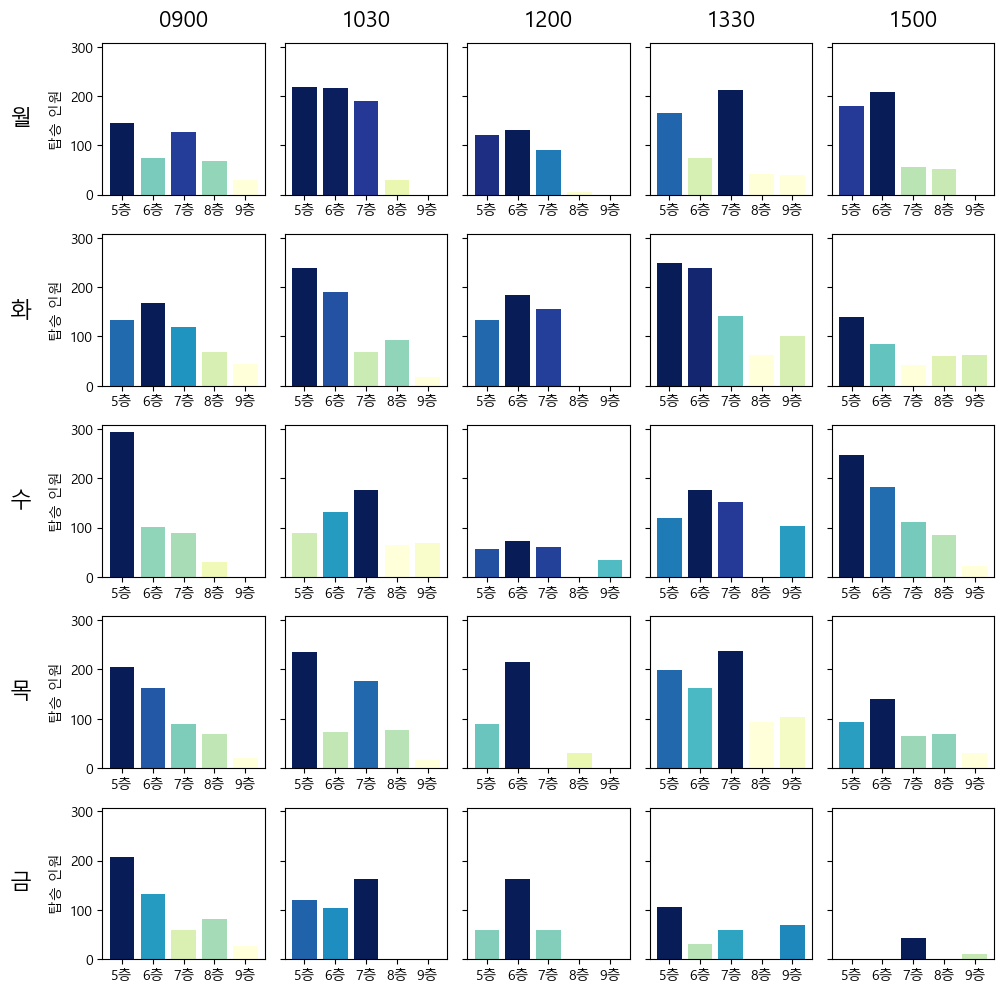

In [5]:
# 시각화
y = list(df.index.get_level_values('요일').unique()) # subplots를 이용 할 것이다.
x = list(df.index.get_level_values('시간').unique())

fig, axes = plt.subplots(5, 5, figsize=(10, 10), sharey=True)

for i in range(len(y)): # 요일
    floor = list(df.index.get_level_values('층').unique())
    for j in range(len(x)): # 시간
        start = (i*25) + (j*5)
        expected_num = df['예상 탑승 인원'].iloc[start:start+5].tolist()
        sum_n = sum(expected_num)
        normalized = [((i / sum_n)*0.4)+0.3 for i in expected_num] # 총 
        cmap = plt.cm.YlGnBu
        norm = mcolors.Normalize(vmin=min(normalized), vmax=max(normalized))
        colors = cmap(norm(normalized))
        ax = axes[i, j]
        ax.bar(floor, expected_num, color=colors)
        if j == 0:
            ax.set_ylabel('탑승 인원')
            
# 첫 번째 열에 요일 라벨 추가
for i, day in enumerate(y):
    axes[i, 0].text(-0.5, 0.5, day, transform=axes[i, 0].transAxes,
                    va='center', ha='center', fontsize=16)

# 첫 번째 행에 시간 라벨 추가
for j, time in enumerate(x):
    axes[0, j].text(0.5, 1.15, str(time).zfill(4), transform=axes[0, j].transAxes,
                    va='center', ha='center', fontsize=16)
    
plt.tight_layout()
plt.show()

In [6]:
# 현행 엘리베이터 수송 총 시간, 시뮬레이션
# 엘레베이터 3대, 1층에서 5층 가는데 소요시간 22초, 1층~7층 26초, 1~9층 30초, 내려갈 때도 동일했다.
# 총 수송시간과 왕복 횟수를 예측하여 dataframe 형태로 만들기
days = ['월', '화', '수', '목', '금']
times = ['0900', '1030', '1200', '1330', '1500']

# 빈 DataFrame 생성
res_df = pd.DataFrame(0, columns=pd.MultiIndex.from_product([times, ['총 인원', '총 수송시간', '왕복 횟수']]), index=days)
# 열 가운데 정렬을 위한 스타일링 적용 함수
def center_align_columns(df):
    return df.style.set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
res_df

0900              1030              1200              1330               \
  총 인원 총 수송시간 왕복 횟수 총 인원 총 수송시간 왕복 횟수 총 인원 총 수송시간 왕복 횟수 총 인원 총 수송시간 왕복 횟수   
월    0      0     0    0      0     0    0      0     0    0      0     0   
화    0      0     0    0      0     0    0      0     0    0      0     0   
수    0      0     0    0      0     0    0      0     0    0      0     0   
목    0      0     0    0      0     0    0      0     0    0      0     0   
금    0      0     0    0      0     0    0      0     0    0      0     0   

  1500               
  총 인원 총 수송시간 왕복 횟수  
월    0      0     0  
화    0      0     0  
수    0      0     0  
목    0      0     0  
금    0      0     0

In [7]:
# 현행 엘리베이터 수송 총 시간, 시뮬레이션
# 엘레베이터 3대, 1층에서 5층 가는데 소요시간 22초, 1층~7층 26초, 1~9층 30초, 내려갈 때도 동일했다.
# 총 수송시간과 왕복 횟수를 예측하여 dataframe 형태로 만들기

round_trip_to_5f = 54 # 6f -> 58, ... 9f -> 70
add_door_open = 18 # 왕복에서 문 한번 더 열릴 때 추가로 소모되는 시간.
def elavator_round(passengers_array):
    global expected_time
    global num_of_round
    if len(passengers_array) >= 15:
        cap = 15
    else:
        cap = len(passengers_array)
    tmp = passengers_array[-cap:]
    passengers_array = passengers_array[:-cap]
    # numpy의 unique 함수를 사용하기 위해 넘파이배열로 바꿔준다.
    tmp = np.array(tmp, int)
    top = tmp.max() # 어느 층과의 왕복에 걸리는 시간 + 올라갈 때 내려갈 때 추가로 문이 열리는 횟수
    round_trip_time = round_trip_to_5f+(top-5)*4
    door_open = len(np.unique(tmp)) - 1 + 1# len(tmp)(올라갈 때 방문 층의 개수) - 1(왕복하는 층) + 1(내려올 때 열린다고 가정 한 횟수) = 1  
    door_open_time = door_open*add_door_open
    expected_time += (round_trip_time + door_open_time)                # *20 문이 한번 열릴 때 20초가 추가로 걸린다
    num_of_round += 1
    return passengers_array
    
# 현행 엘리베이터 각 시간대 별 수송 시간 예측
for i in range(len(y)): # 요일
    floor = list(df.index.get_level_values('층').unique())
    for j in range(len(x)): # 시간
        expected_time = 0
        num_of_round = 0
        start = (i*25) + (j*5)
        expected_num = df['예상 탑승 인원'].iloc[start:start+5].tolist()
        sum_n = sum(expected_num)
        passengers_pool = []
        for k in range(len(expected_num)): # 5층, 6층, 7층, 8층, 9층 인원... 차례대로 들어간다.
            for l in range(expected_num[k]): # 각 층마다 인원만큼 배열을 채운다.
                # k가 0일 때 5층.. 층 식별번호는 k+5
                passengers_pool.append(k+5)
        np.random.shuffle(passengers_pool) # 줄을 섞어준다. 
        
        while len(passengers_pool) != 0:
            passengers_pool = elavator_round(passengers_pool)
        res_df.iloc[i][3*j] = sum_n
        res_df.iloc[i][3*j+1] = expected_time//3
        res_df.iloc[i][3*j+2] = num_of_round
        
center_align_columns(res_df) # 5층에서 9층에 가는 모든 학생들이 출석, 연강이 아니고, 엘리베이터를 타고 간다고 했을 때

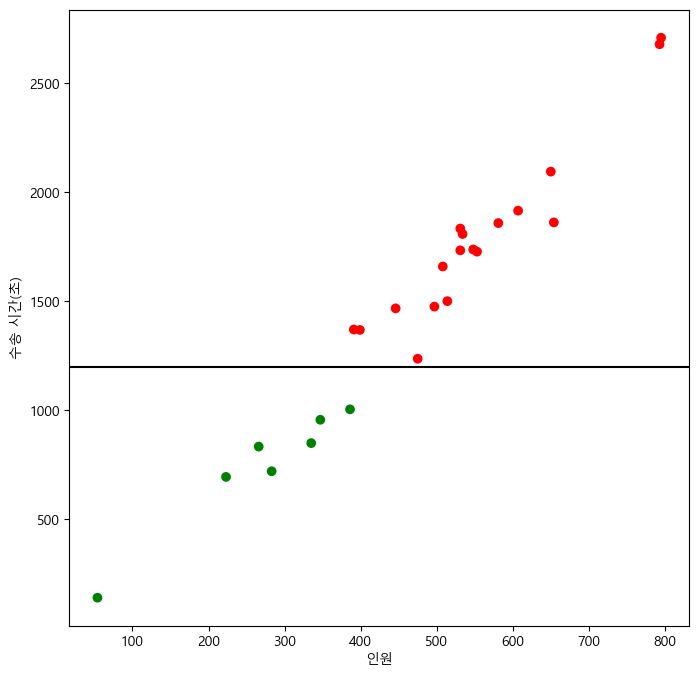

In [8]:
# 시각화 2
x = res_df.loc[:, pd.IndexSlice[:, '총 인원']].values.flatten().tolist()
y = res_df.loc[:, pd.IndexSlice[:, '총 수송시간']].values.flatten().tolist()
fig = plt.figure(figsize=(8,8))

plt.scatter(x, y, c=['red' if a > 1200 else 'green' for a in y])
plt.axhline(1200, color='black') # 20분
plt.xlabel('인원')
plt.ylabel('수송 시간(초)')

plt.show()

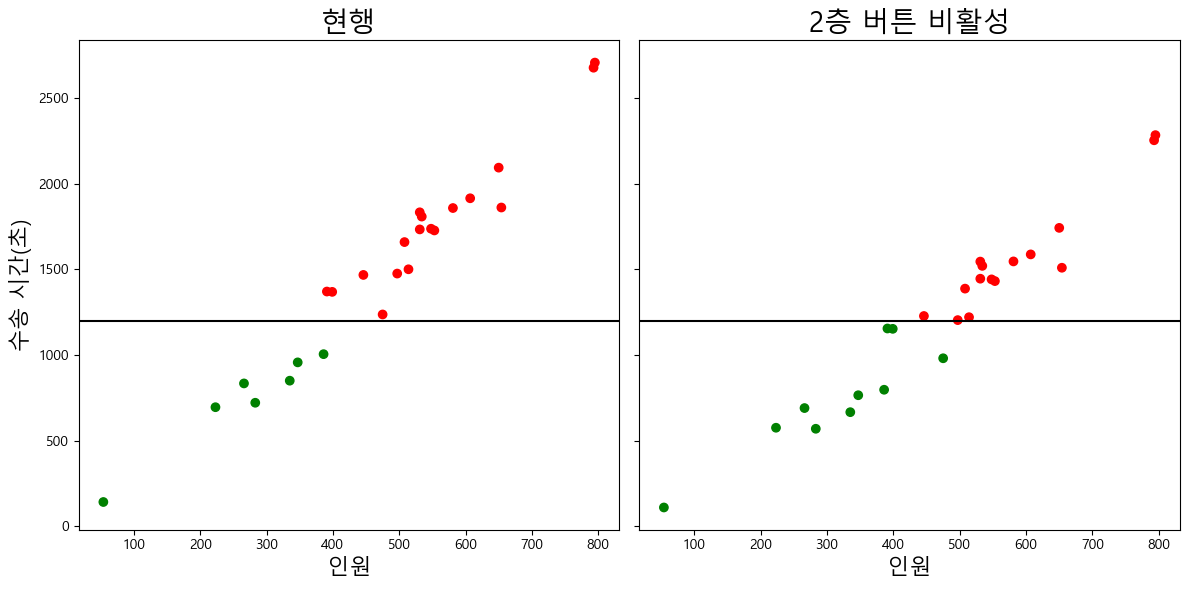

In [9]:
# 해결 방안 제시 1
# 2층에서 못 잡게 할 경우
# 2층에서 잡히는 경우가 5번 왕복 중 2번 있다고 가정. 왕복 1번 당 평균적으로 8초가 절약된다.


x = res_df.loc[:, pd.IndexSlice[:, '총 인원']].values.flatten().tolist()
y = res_df.loc[:, pd.IndexSlice[:, '총 수송시간']].values.flatten().tolist()
z = res_df.loc[:, pd.IndexSlice[:, '왕복 횟수']].values.flatten().tolist()
y_2 = [a - 8*b for a, b in zip(y, z)]

fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

axes[0].scatter(x, y, c=['red' if a > 1200 else 'green' for a in y])
axes[1].scatter(x, y_2, c=['red' if a > 1200 else 'green' for a in y_2])
axes[0].axhline(1200, color='black')
axes[1].axhline(1200, color='black')

axes[0].set_title('현행', fontsize=20)
axes[0].set_xlabel('인원', fontsize=16)
axes[0].set_ylabel('수송 시간(초)', fontsize=16)

axes[1].set_title('2층 버튼 비활성', fontsize=20)
axes[1].set_xlabel('인원', fontsize=16)

plt.tight_layout()
plt.show()

In [10]:
# 해결 방안 제시 2
# 홀짝층 운영 or 저층(5,6), 고층(7,8,9) 운영

days = ['월', '화', '수', '목', '금']
times = ['0900', '1030', '1200', '1330', '1500']

sol2_df = pd.DataFrame(0, columns=pd.MultiIndex.from_product([times, ['총 인원', '총 수송시간', '왕복 횟수']]), index=days)
sol2_df

0900              1030              1200              1330               \
  총 인원 총 수송시간 왕복 횟수 총 인원 총 수송시간 왕복 횟수 총 인원 총 수송시간 왕복 횟수 총 인원 총 수송시간 왕복 횟수   
월    0      0     0    0      0     0    0      0     0    0      0     0   
화    0      0     0    0      0     0    0      0     0    0      0     0   
수    0      0     0    0      0     0    0      0     0    0      0     0   
목    0      0     0    0      0     0    0      0     0    0      0     0   
금    0      0     0    0      0     0    0      0     0    0      0     0   

  1500               
  총 인원 총 수송시간 왕복 횟수  
월    0      0     0  
화    0      0     0  
수    0      0     0  
목    0      0     0  
금    0      0     0

In [11]:
n_days, n_times = 5, 5
ELEVATOR_CAPACITY = 15
E1_floor = [5, 6, 7, 8, 9]
E2_floor = [5, 7, 9]
E3_floor = [6, 8]
Elevators_to = [E1_floor, E2_floor, E3_floor]

def make_passengers_pool(arr):
    passengers_pool = []
    for k in range(len(arr)): # 5층, 6층, 7층, 8층, 9층 인원.
        for l in range(arr[k]): # 각 층마다 인원만큼 배열을 채운다.
            # k가 0일 때 5층.. 층 식별번호는 k+5
            passengers_pool.append(k+5) 
    # 현재 5층부터 차례대로 인원만큼 들어간 상황 [5,5,5,5,5,5,.....6,6,6,6,....7,7,7,....,8,8,..,9]
    np.random.shuffle(passengers_pool) # 줄을 섞어준다.
    return passengers_pool
#--------------
class Sixtieth_1f: # 사람 수, 엘레베이터 운행 방식(몇층으로 가는지)
    def __init__(self, line:list, elevator_to): # elevator_to = [[], [], []] # 내부 배열은 각 엘레베이터가 가는 층
        self.elevators = elevator_to
        self.line = line
        self.timer = 0
        self.sw1, self.tc1 = 0, 0 # 스톱워치, 타임 코스트
        self.sw2, self.tc2 = 0, 0
        self.sw3, self.tc3 = 0, 0
        
    def run(self): # return total_time_spent, total_round_trip
        e1 = Elevators(self.elevators[0][:])
        e2 = Elevators(self.elevators[1][:])
        e3 = Elevators(self.elevators[2][:])
        while True:
            if len(self.line) == 0: #줄에 더 사람이 없으면
                return self.timer
                break
                
            # e1 운행
            if e1.is_busy == False: # e1이 운행가능 경우
                e1.is_busy = True
                self.sw1 = self.timer # 스톱워치에 지금 시간 기록 #is_busy == True 가 운행 시간만큼 유지된다.
                tmp = self.__filler(self.line, self.elevators[0][:])
                if len(tmp) != 0:
                    self.tc1 = e1.elavator_round(tmp)
                if len(tmp) == 0: # 탑승 할 승객이 없으면
                    e1.is_busy == False

            else: # 운행불가 경우
                if self.tc1 == (self.timer-self.sw1+1): # 1초 뒤에 왕복운행 종료 인 경우 
                    e1.is_busy = False
                    self.sw1, self.tc1 = 0, 0 #값 초기화
                    
            if e2.is_busy == False:
                e2.is_busy = True
                self.sw2 = self.timer
                tmp = self.__filler(self.line, self.elevators[1][:])
                if len(tmp) != 0:
                    self.tc2 = e2.elavator_round(tmp)
                if len(tmp) == 0: # 탑승 할 승객이 없으면
                    e2.is_busy == False

            else:
                if self.tc2 == (self.timer-self.sw2+1): # 1초 뒤에 왕복운행 종료 인 경우 
                    e2.is_busy = False
                    self.sw2, self.tc2 = 0, 0 #값 초기화
            
            if e3.is_busy == False:
                e3.is_busy = True
                self.sw3 = self.timer
                tmp = self.__filler(self.line, self.elevators[2][:])
                if len(tmp) != 0:
                    self.tc3 = e3.elavator_round(tmp)
                if len(tmp) == 0: # 탑승 할 승객이 없으면
                    e3.is_busy == False

            else:
                if self.tc3 == (self.timer-self.sw3+1): # 1초 뒤에 왕복운행 종료 인 경우 
                    e3.is_busy = False
                    self.sw3, self.tc3 = 0, 0 #값 초기화
                    
            self.timer += 1
            
    def __filler(self, passengers_array, maneuver): # 엘레베이터 내에 15명을 채워주고(tmp), 줄에서 15명을 지우는 함수
        tmp = []
        for i in range(0,len(passengers_array)):
            try:
                if passengers_array[i] in maneuver:
                    tmp.append(passengers_array[i])
                    self.line.remove(passengers_array[i])
                    if len(tmp) == ELEVATOR_CAPACITY: # 15명 찼으면 출발
                        break
            except:
                pass
        return tmp
            
#--------------
class Elevators: # 엘레베이터 클래스 
    def __init__(self, floor):
        self.via_floor = floor    # 운행하는 층 
        self.is_busy = False
    
    def elavator_round(self, tmp_array): # 엘레베이터 운행 함수
#         global expected_time
        global num_of_round
        tmp = np.array(tmp_array, int)
        top = tmp.max() # 어느 층과의 왕복에 걸리는 시간 + 올라갈 때 내려갈 때 추가로 문이 열리는 횟수
        round_trip_time = round_trip_to_5f+(top-5)*4
        door_open = len(np.unique(tmp)) - 1 + 1# len(tmp)(올라갈 때 방문 층의 개수) - 1(왕복하는 층) + 1(내려올 때 열린다고 가정 한 횟수) = 1  
        door_open_time = door_open*add_door_open
#         expected_time += (round_trip_time + door_open_time)   # *20 문이 한번 열릴 때 20초가 추가로 걸린다
        num_of_round += 1
        return round_trip_time + door_open_time

#--------------- 실행부 ( 완성 )
for i in range(n_days):     # 요일
    for j in range(n_times): # 층 
        num_of_round = 0
        start = (i*25) + (j*5)
        expected_num = df['예상 탑승 인원'].iloc[start:start+5].tolist()
        sum_n = sum(expected_num)
        passengers_pool = make_passengers_pool(expected_num)
        
        sixtieth_1f = Sixtieth_1f(passengers_pool, Elevators_to)
        
        sol2_df.iloc[i][3*j] = sum_n
        sol2_df.iloc[i][3*j+1] = sixtieth_1f.run()
        sol2_df.iloc[i][3*j+2] = num_of_round

center_align_columns(sol2_df)

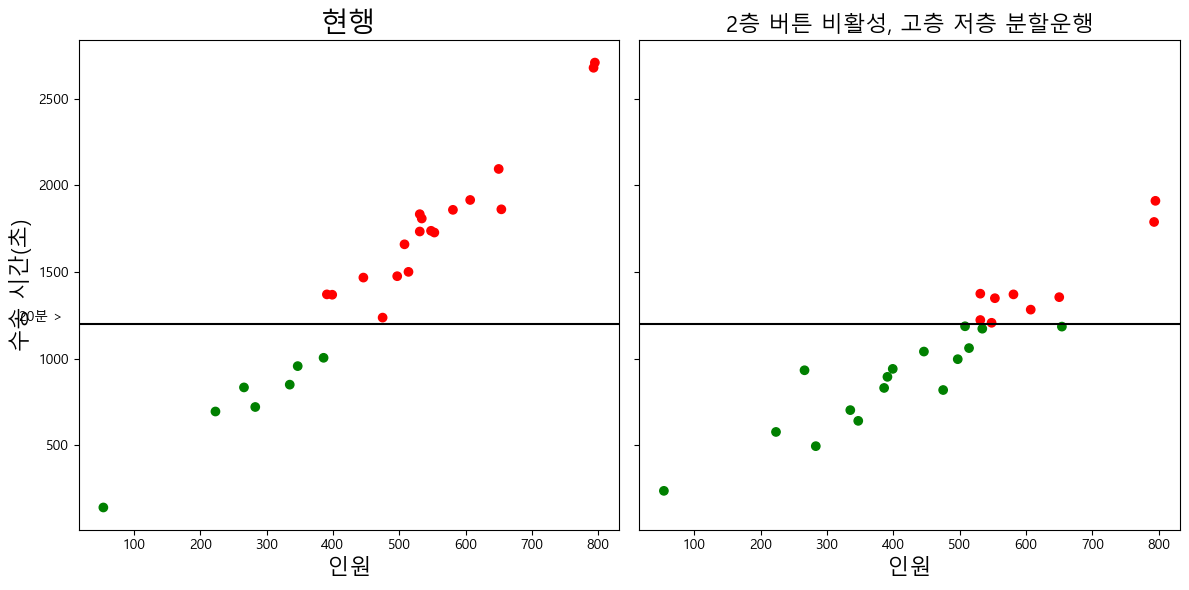

In [12]:
# 1, 2번 해결방안 동시에 적용

x = sol2_df.loc[:, pd.IndexSlice[:, '총 인원']].values.flatten().tolist()
y_0 = res_df.loc[:, pd.IndexSlice[:, '총 수송시간']].values.flatten().tolist()
y = sol2_df.loc[:, pd.IndexSlice[:, '총 수송시간']].values.flatten().tolist()
z = sol2_df.loc[:, pd.IndexSlice[:, '왕복 횟수']].values.flatten().tolist()
y_2 = [a - 8*b for a, b in zip(y, z)]

fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

axes[0].scatter(x, y_0, c=['red' if a > 1200 else 'green' for a in y_0])
axes[1].scatter(x, y_2, c=['red' if a > 1200 else 'green' for a in y_2])
axes[0].axhline(1200, color='black')
axes[0].text(0.8, 1200, '20분 > ', ha='right', va='bottom')
axes[1].axhline(1200, color='black')

axes[0].set_title('현행', fontsize=20)
axes[0].set_xlabel('인원', fontsize=16)
axes[0].set_ylabel('수송 시간(초)', fontsize=16)

axes[1].set_title('2층 버튼 비활성, 고층 저층 분할운행', fontsize=16)
axes[1].set_xlabel('인원', fontsize=16)

plt.tight_layout()
plt.show()